In [2]:
from utilities import *

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
path_medication_all = np.array(glob.glob("/drives/drive2/Patient Safety Graph/Data/20230310_data_release_medication/*/*.csv"))

pth_issues </br>
['/drives/drive2/Patient Safety Graph/Data/20230310_data_release_medication/2021/202302252021OUT_4.csv', </br>
 '/drives/drive2/Patient Safety Graph/Data/20230310_data_release_medication/2020/202302252020OUT_6.csv']

In [6]:
df_medicaiton = pd.read_csv(path_medication_all[0])

In [7]:
cols = df_medicaiton.columns

In [8]:
d=""
for pth in path_medication_all[1:]:
    d=pth 
    pd_tmp = pd.read_csv(pth)
    pd_tmp = pd_tmp[cols]
    df_medicaiton = pd.concat([df_medicaiton,pd_tmp ])

In [9]:
df_medicaiton.shape

(40761128, 24)

In [12]:
df_medicaiton.head()

,ENCRYPTED_MRN,START_CASE_DATE,START_ENCRYPTED_CASE_NUMBER,START_ENCRYPTED_HOSP_ENCOUNTER,ORDR_DOSING_WGHT,TAKEN_DT,INTRAOP_MED,MAR_ACTION,MED_ORDER_DISPLAY_NAME,MED_NAME,...,TOTAL_DOSE,MED_DOSE_UNIT_DESC,MED_DURATN_DESC,MED_DURATN_UNIT_DESC,MED_INFUSN_RATE,MED_INFUSN_RATE_UNIT_DESC,MED_CODE,MED_THERAPY_CLASS,PHARMACY_CLASS,PHARMACY_SUBCLASS
0,b'\x16\x7f\x1eY\x83\xf4\xf5\x8f\xc1\r\xa6',9/6/2011,b'\x16z\xc0\xce<\xc1\xfat\xe5b',b'\x16\x7f\x17:\xdeV\xb6\xd9\xf6\xc8Im\xfe\x1d...,120.200,2011-09-10 00:09:00,N,GIVEN,cefTRIAXone (ROCEPHIN) 1 g in 0.9 % NaCl 100 m...,CEFTRIAXONE SODIUM 1 G IJ SOLR,...,1,g,30.0,Minutes,200,mL/hr,9487,ANTI-INFECTIVE AGENTS,CEPHALOSPORINS,CEPHALOSPORINS - 3RD GENERATION
1,b'\x16\x7f\x1eY\x83\xf4\xf5\x8f\xc1\r\xa6',9/2/2011,b'\x16z\xc0\xcf\xbb\xf7\x1fi\xcf\x19',"b""\x16\x7f\x17:\xdeV\xb7'\xc5\xba\x1a\xf2\x07Ih""",120.200,2011-09-10 00:10:00,N,GIVEN,metoprolol (LOPRESSOR) IV solution 5 mg,METOPROLOL TARTRATE 5 MG/5ML IV SOLN,...,5,mg,NaN,NaN,NaN,NaN,92207,CARDIOVASCULAR AGENTS,BETA BLOCKERS,BETA BLOCKERS CARDIO-SELECTIVE
2,b'\x16\x7f\x1eY\x83\xf4\xf5\x8f\xc1\r\xa6',9/6/2011,b'\x16z\xc0\xce<\xc1\xfat\xe5b',b'\x16\x7f\x17:\xdeV\xb6\xd9\xf6\xc8Im\xfe\x1d...,135.200,2011-09-10 03:04:00,N,GIVEN,diltiazem (CARDIZEM) injection 1-10 mg,DILTIAZEM HCL 50 MG/10ML IV SOLN,...,10,mg,NaN,NaN,NaN,NaN,95774,CARDIOVASCULAR AGENTS,CALCIUM BLOCKERS,CALCIUM CHANNEL BLOCKERS
3,b'\x16\x7f\x1eY\x83\xf4\xf5\x8f\xc1\r\xa6',9/2/2011,b'\x16z\xc0\xcf\xbb\xf7\x1fi\xcf\x19',"b""\x16\x7f\x17:\xdeV\xb7'\xc5\xba\x1a\xf2\x07Ih""",135.200,2011-09-10 03:04:00,N,GIVEN,metoprolol (LOPRESSOR) IV solution 5 mg,METOPROLOL TARTRATE 5 MG/5ML IV SOLN,...,5,mg,NaN,NaN,NaN,NaN,92207,CARDIOVASCULAR AGENTS,BETA BLOCKERS,BETA BLOCKERS CARDIO-SELECTIVE
4,b'\x16\x7f\x1eY\x83\xf4\xf5\x8f\xc1\r\xa6',9/6/2011,b'\x16z\xc0\xce<\xc1\xfat\xe5b',b'\x16\x7f\x17:\xdeV\xb6\xd9\xf6\xc8Im\xfe\x1d...,NaN,2011-09-10 05:40:00,N,GIVEN,metoprolol (LOPRESSOR) IV solution 5 mg,METOPROLOL TARTRATE 5 MG/5ML IV SOLN,...,5,mg,NaN,NaN,NaN,NaN,92207,CARDIOVASCULAR AGENTS,BETA BLOCKERS,BETA BLOCKERS CARDIO-SELECTIVE


In [14]:
df_medicaiton['MED_NUMBER'] = df_medicaiton['ENCRYPTED_MRN']+'_'+df_medicaiton['TAKEN_DT']+'_'+df_medicaiton['MED_ORDER_DISPLAY_NAME']+'_'+df_medicaiton['TOTAL_DOSE'].astype(str)

In [ ]:
len(set(df_medicaiton['MED_CODE'])),len(set(df_medicaiton['MED_THERAPY_CLASS'])),len(set(df_medicaiton['PHARMACY_CLASS'])),len(set(df_medicaiton['PHARMACY_SUBCLASS']))

In [21]:
df_medicaiton_distinct = df_medicaiton.drop_duplicates(['MED_NUMBER'],ignore_index=True)

In [22]:
print(df_medicaiton.shape)
print(df_medicaiton_distinct.shape)

(40761128, 25)
(37158294, 25)


In [23]:
df_medicaiton_distinct.columns

Index(['ENCRYPTED_MRN', 'START_CASE_DATE', 'START_ENCRYPTED_CASE_NUMBER',
       'START_ENCRYPTED_HOSP_ENCOUNTER', 'ORDR_DOSING_WGHT', 'TAKEN_DT',
       'INTRAOP_MED', 'MAR_ACTION', 'MED_ORDER_DISPLAY_NAME', 'MED_NAME',
       'SIMPLE_GENERIC_NAME', 'MED_FORM', 'MED_ROUTE', 'MED_STRNGTH',
       'TOTAL_DOSE', 'MED_DOSE_UNIT_DESC', 'MED_DURATN_DESC',
       'MED_DURATN_UNIT_DESC', 'MED_INFUSN_RATE', 'MED_INFUSN_RATE_UNIT_DESC',
       'MED_CODE', 'MED_THERAPY_CLASS', 'PHARMACY_CLASS', 'PHARMACY_SUBCLASS',
       'MED_NUMBER'],
      dtype='object')

In [34]:
therapy_class_top = df_medicaiton_distinct.groupby('MED_THERAPY_CLASS').agg({'ENCRYPTED_MRN':'nunique'}).sort_values('ENCRYPTED_MRN',ascending=False).reset_index()
pharmarcy_class_top = df_medicaiton_distinct.groupby('PHARMACY_CLASS').agg({'ENCRYPTED_MRN':'nunique'}).sort_values('ENCRYPTED_MRN',ascending=False).reset_index()
pharmarcy_subclass_top = df_medicaiton_distinct.groupby('PHARMACY_SUBCLASS').agg({'ENCRYPTED_MRN':'nunique'}).sort_values('ENCRYPTED_MRN',ascending=False).reset_index()

In [83]:
therapy_class_top.columns = ['MED_THERAPY_CLASS','N_unique_MRN']
print('N_unique_therapy_class',therapy_class_top.shape[0])
therapy_class_top.head(15)

N_unique_therapy_class 1235


,MED_THERAPY_CLASS,N_unique_MRN
0,ANALGESICS & ANESTHETICS,220964
1,NUTRITIONAL PRODUCTS,212590
2,GASTROINTESTINAL AGENTS,189395
3,ANTI-INFECTIVE AGENTS,152224
4,CENTRAL NERVOUS SYSTEM DRUGS,142265
5,CARDIOVASCULAR AGENTS,131938
6,ENDOCRINE & METABOLIC DRUGS,124982
7,NEUROMUSCULAR DRUGS,121464
8,MISCELLANEOUS PRODUCTS,116395
9,HEMATOLOGICAL AGENTS,108586


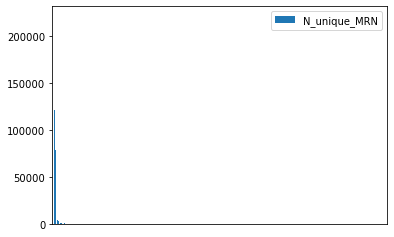

In [85]:
therapy_class_top.reset_index().plot(kind="bar",x="index",y="N_unique_MRN",xlabel="",xticks=[])
plt.show()

In [79]:
pharmarcy_class_top.columns = ['PHARMACY_CLASS','N_unique_MRN']
print('N_unique_pharmarcy_class',pharmarcy_class_top.shape[0])
pharmarcy_class_top.head(15)

N_unique_pharmarcy_class 1552


,PHARMACY_CLASS,N_unique_MRN
0,MINERALS & ELECTROLYTES,193514
1,ANALGESICS-NARCOTIC,170467
2,GENERAL ANESTHETICS,164174
3,ANTIEMETICS,153708
4,LOCAL ANESTHETICS-PARENTERAL,149276
5,ANALGESICS-NONNARCOTIC,126891
6,HYPNOTICS,114557
7,CEPHALOSPORINS,108969
8,NEUROMUSCULAR BLOCKERS,99648
9,ULCER DRUGS,96949


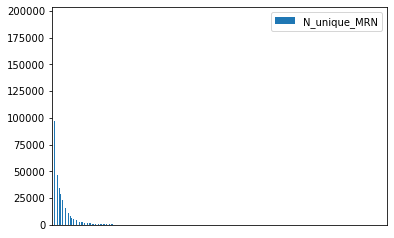

In [81]:
pharmarcy_class_top.reset_index().plot(kind="bar",x="index",y="N_unique_MRN",xlabel="",xticks=[])
plt.show()

In [60]:
pharmarcy_subclass_top.columns = ['PHARMACY_SUBCLASS','N_unique_MRN']
print('N_unique_pharmarcy_subclass',pharmarcy_subclass_top.shape[0])
pharmarcy_subclass_top.head(15)

N_unique_pharmarcy_subclass 1543


,PHARMACY_SUBCLASS,N_unique_MRN
0,OPIOID AGONISTS,168783
1,ANESTHETICS - MISC.,161922
2,5-HT3 RECEPTOR ANTAGONISTS,153124
3,LOCAL ANESTHETICS - AMIDES,146111
4,ELECTROLYTE MIXTURES,144489
5,SODIUM,138628
6,ANALGESICS OTHER,121831
7,NON-BARBITURATE HYPNOTICS,114446
8,NONDEPOLARIZING MUSCLE RELAXANTS,90427
9,CEPHALOSPORINS - 1ST GENERATION,88766


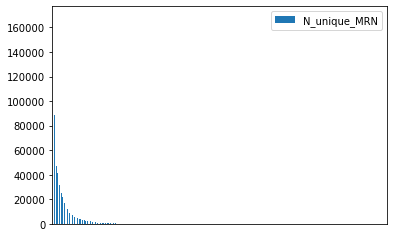

In [78]:
pharmarcy_subclass_top.reset_index().plot(kind="bar",x="index",y="N_unique_MRN",xlabel="",xticks=[])
plt.show()

In [57]:
df_medicaiton_distinct_classes = df_medicaiton_distinct.groupby(['MED_THERAPY_CLASS',
                                                                 'PHARMACY_CLASS',
                                                                 'PHARMACY_SUBCLASS']).agg({'ENCRYPTED_MRN':'nunique'}).sort_values('ENCRYPTED_MRN',ascending=False).reset_index()


In [58]:
df_medicaiton_distinct_classes.columns = ['MED_THERAPY_CLASS','PHARMACY_CLASS','PHARMACY_SUBCLASS','N_unique_MRN']

In [59]:
print("Total combinations of 3 classes:", df_medicaiton_distinct_classes.shape[0])
df_medicaiton_distinct_classes.head(15)

Total combinations of 3 classes: 2336


,MED_THERAPY_CLASS,PHARMACY_CLASS,PHARMACY_SUBCLASS,N_unique_MRN
0,ANALGESICS & ANESTHETICS,ANALGESICS-NARCOTIC,OPIOID AGONISTS,168783
1,ANALGESICS & ANESTHETICS,GENERAL ANESTHETICS,ANESTHETICS - MISC.,161922
2,GASTROINTESTINAL AGENTS,ANTIEMETICS,5-HT3 RECEPTOR ANTAGONISTS,153124
3,ANALGESICS & ANESTHETICS,LOCAL ANESTHETICS-PARENTERAL,LOCAL ANESTHETICS - AMIDES,146111
4,NUTRITIONAL PRODUCTS,MINERALS & ELECTROLYTES,ELECTROLYTE MIXTURES,144489
5,NUTRITIONAL PRODUCTS,MINERALS & ELECTROLYTES,SODIUM,138628
6,ANALGESICS & ANESTHETICS,ANALGESICS-NONNARCOTIC,ANALGESICS OTHER,121831
7,CENTRAL NERVOUS SYSTEM DRUGS,HYPNOTICS,NON-BARBITURATE HYPNOTICS,114446
8,NEUROMUSCULAR DRUGS,NEUROMUSCULAR BLOCKERS,NONDEPOLARIZING MUSCLE RELAXANTS,90427
9,ANTI-INFECTIVE AGENTS,CEPHALOSPORINS,CEPHALOSPORINS - 1ST GENERATION,88766


In [55]:
df_medicaiton_distinct_classes[df_medicaiton_distinct_classes['MED_THERAPY_CLASS']=="?"]

,MED_THERAPY_CLASS,PHARMACY_CLASS,PHARMACY_SUBCLASS,ENCRYPTED_MRN
35,?,?,?,27548
564,?,ASSORTED CLASSES,CONTINUOUS RENAL REPLACEMENT THERAPY (CRRT) SO...,8


In [52]:
tmp = df_medicaiton_distinct_classes.groupby('PHARMACY_SUBCLASS').size().reset_index()
tmp.columns=['PHARMACY_SUBCLASS','N_']
tmp.sort_values('N',ascending=False).reset_index()[10:20]

,index,PHARMACY_SUBCLASS,N
10,78,"4720,NUTRITIONAL PRODUCTS,MINERALS & ELECTROLY...",28
11,60,"403322,NUTRITIONAL PRODUCTS,MINERALS & ELECTRO...",27
12,76,"410200,NUTRITIONAL PRODUCTS,NUTRIENTS,CARBOHYD...",24
13,143,"ANALGESICS-NARCOTIC,OPIOID AGONISTS",23
14,88,"6429,NUTRITIONAL PRODUCTS,MINERALS & ELECTROLY...",20
15,56,"38445,NUTRITIONAL PRODUCTS,MULTIVITAMINS,PEDIA...",20
16,52,"30253,NUTRITIONAL PRODUCTS,NUTRIENTS,PROTEINS",16
17,99,"91393,ENDOCRINE & METABOLIC DRUGS,MISC. ENDOCR...",15
18,818,"mL/hr,2367,NUTRITIONAL PRODUCTS,NUTRIENTS,CARB...",14
19,832,"mL/hr,404428,GASTROINTESTINAL AGENTS,ULCER DRU...",14


In [53]:
df_medicaiton_distinct_classes[df_medicaiton_distinct_classes['PHARMACY_SUBCLASS']=='ANALGESICS-NARCOTIC,OPIOID AGONISTS']

,MED_THERAPY_CLASS,PHARMACY_CLASS,PHARMACY_SUBCLASS,ENCRYPTED_MRN
459,10814,ANALGESICS & ANESTHETICS,"ANALGESICS-NARCOTIC,OPIOID AGONISTS",15
496,10813,ANALGESICS & ANESTHETICS,"ANALGESICS-NARCOTIC,OPIOID AGONISTS",11
498,3757,ANALGESICS & ANESTHETICS,"ANALGESICS-NARCOTIC,OPIOID AGONISTS",11
660,14632,ANALGESICS & ANESTHETICS,"ANALGESICS-NARCOTIC,OPIOID AGONISTS",5
673,133584,ANALGESICS & ANESTHETICS,"ANALGESICS-NARCOTIC,OPIOID AGONISTS",5
706,405593,ANALGESICS & ANESTHETICS,"ANALGESICS-NARCOTIC,OPIOID AGONISTS",4
753,404621,ANALGESICS & ANESTHETICS,"ANALGESICS-NARCOTIC,OPIOID AGONISTS",4
870,400585,ANALGESICS & ANESTHETICS,"ANALGESICS-NARCOTIC,OPIOID AGONISTS",3
891,404622,ANALGESICS & ANESTHETICS,"ANALGESICS-NARCOTIC,OPIOID AGONISTS",3
896,404395,ANALGESICS & ANESTHETICS,"ANALGESICS-NARCOTIC,OPIOID AGONISTS",3
